In [1]:
import pandas as pd
import glob

In [2]:
path = r"../raw/api_data_aadhar_demographic_*.csv"
files = glob.glob(path)

print("Files found:", files)

df = pd.concat(
    (pd.read_csv(f, dtype=str) for f in files),
    ignore_index=True
)

Files found: ['../raw\\api_data_aadhar_demographic_0_500000.csv', '../raw\\api_data_aadhar_demographic_1000000_1500000.csv', '../raw\\api_data_aadhar_demographic_1500000_2000000.csv', '../raw\\api_data_aadhar_demographic_2000000_2071700.csv', '../raw\\api_data_aadhar_demographic_500000_1000000.csv']


In [3]:
df.shape
df.columns
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        object
 4   demo_age_5_17  object
 5   demo_age_17_   object
dtypes: object(6)
memory usage: 94.8+ MB


In [4]:
df['state_raw'] = df['state']
df['date_raw'] = df['date']

In [5]:
df.duplicated().sum()

np.int64(473601)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df['state'] = (
    df['state']
    .astype(str)
    .str.strip()
    .str.title()
)

df['district'] = (
    df['district']
    .astype(str)
    .str.strip()
    .str.title()
)

In [8]:
df['state'].nunique()

58

In [9]:
sorted(df['state'].unique())

['100000',
 'Andaman & Nicobar Islands',
 'Andaman And Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Balanagar',
 'Bihar',
 'Chandigarh',
 'Chhatisgarh',
 'Chhattisgarh',
 'Dadra & Nagar Haveli',
 'Dadra And Nagar Haveli',
 'Dadra And Nagar Haveli And Daman And Diu',
 'Daman & Diu',
 'Daman And Diu',
 'Darbhanga',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jaipur',
 'Jammu & Kashmir',
 'Jammu And Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madanapalle',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Nagpur',
 'Odisha',
 'Orissa',
 'Pondicherry',
 'Puducherry',
 'Punjab',
 'Puttenahalli',
 'Raja Annamalai Puram',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'Uttaranchal',
 'West  Bengal',
 'West Bangal',
 'West Bengal',
 'West Bengli',
 'Westbengal']

In [10]:
valid_states = [
    'Andaman And Nicobar Islands',
    'Andhra Pradesh',
    'Arunachal Pradesh',
    'Assam',
    'Bihar',
    'Chandigarh',
    'Chhattisgarh',
    'Delhi',
    'Goa',
    'Gujarat',
    'Haryana',
    'Himachal Pradesh',
    'Jammu And Kashmir',
    'Jharkhand',
    'Karnataka',
    'Kerala',
    'Ladakh',
    'Lakshadweep',
    'Madhya Pradesh',
    'Maharashtra',
    'Manipur',
    'Meghalaya',
    'Mizoram',
    'Nagaland',
    'Odisha',
    'Puducherry',
    'Punjab',
    'Rajasthan',
    'Sikkim',
    'Tamil Nadu',
    'Telangana',
    'Tripura',
    'Uttar Pradesh',
    'Uttarakhand',
    'West Bengal',
    'Dadra And Nagar Haveli And Daman And Diu'
]


In [11]:
df['state'] = (
    df['state']
    .astype(str)
    .str.strip()
    .str.title()
)

In [12]:
state_mapping = {
    'Orissa': 'Odisha',
    'Uttaranchal': 'Uttarakhand',
    'Pondicherry': 'Puducherry',
    'Chhatisgarh': 'Chhattisgarh',
    'West Bangal': 'West Bengal',
    'West Bengli': 'West Bengal',
    'Westbengal': 'West Bengal',
    'West  Bengal': 'West Bengal',
    'Andaman & Nicobar Islands': 'Andaman And Nicobar Islands',
    'Dadra & Nagar Haveli': 'Dadra And Nagar Haveli And Daman And Diu',
    'Daman & Diu': 'Dadra And Nagar Haveli And Daman And Diu',
    'Dadra And Nagar Haveli': 'Dadra And Nagar Haveli And Daman And Diu',
    'Jammu & Kashmir': 'Jammu And Kashmir'
}

df['state'] = df['state'].replace(state_mapping)

In [13]:
df = df[df['state'].isin(valid_states)]

In [14]:
df['state'].nunique()

36

In [15]:
sorted(df['state'].unique())

['Andaman And Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra And Nagar Haveli And Daman And Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu And Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

After standardization and validation, the demographic dataset contains records for 36 valid Indian states and union territories.
Non-administrative entries such as city names and numeric codes were removed.
The final count reflects the actual coverage of the source data, and no artificial adjustments were made.

In [17]:
df['demo_age_5_17'] = pd.to_numeric(
    df['demo_age_5_17'], errors='coerce'
)

df['demo_age_17_'] = pd.to_numeric(
    df['demo_age_17_'], errors='coerce'
)

In [18]:
df[['demo_age_5_17','demo_age_17_']] = df[
    ['demo_age_5_17','demo_age_17_']
].fillna(0)


In [19]:
df['total_demo_updates'] = (
    df['demo_age_5_17'] +
    df['demo_age_17_']
)

In [20]:
df[['demo_age_5_17','demo_age_17_','total_demo_updates']].dtypes

demo_age_5_17         int64
demo_age_17_          int64
total_demo_updates    int64
dtype: object

In [21]:
state_demo = (
    df.groupby('state')['total_demo_updates']
    .sum()
    .sort_values(ascending=False)
)

state_demo.head(10)

state
Uttar Pradesh     6460511
Maharashtra       3824891
Bihar             3638844
West Bengal       2844348
Madhya Pradesh    2104635
Rajasthan         2058896
Tamil Nadu        1686594
Andhra Pradesh    1642142
Chhattisgarh      1421369
Gujarat           1358115
Name: total_demo_updates, dtype: int64

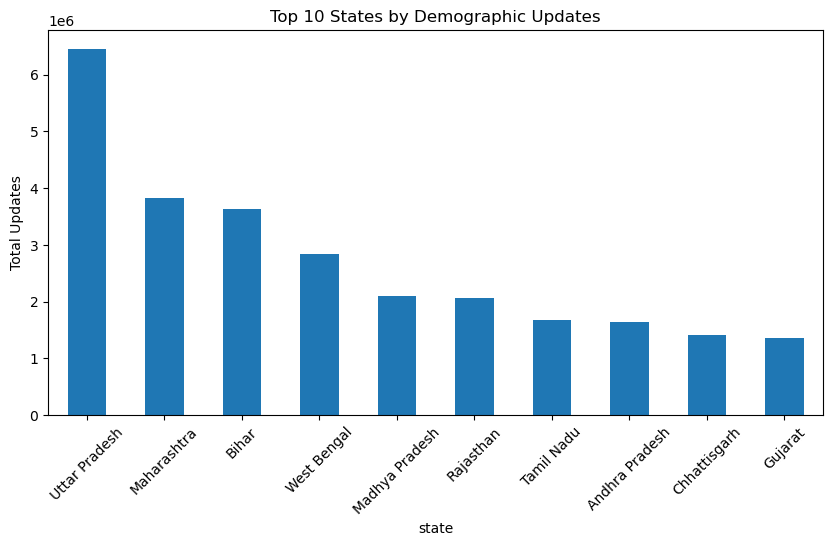

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
state_demo.head(10).plot(kind='bar')
plt.title("Top 10 States by Demographic Updates")
plt.ylabel("Total Updates")
plt.xticks(rotation=45)
plt.show()

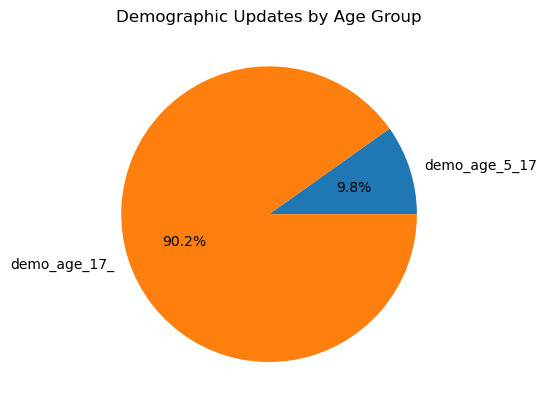

In [23]:
age_demo = df[['demo_age_5_17','demo_age_17_']].sum()

age_demo.plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Demographic Updates by Age Group'
)
plt.ylabel("")
plt.show()

In [24]:
df['update_intensity'] = df['total_demo_updates'] / (
    df.groupby('state')['total_demo_updates'].transform('mean')
)

In [25]:
ratio = (
    df.groupby('state')['demo_age_5_17'].sum() /
    df.groupby('state')['demo_age_17_'].sum()
).sort_values(ascending=False)

ratio.head(10)


state
Ladakh                                      0.308007
Arunachal Pradesh                           0.191247
Dadra And Nagar Haveli And Daman And Diu    0.187481
Karnataka                                   0.184845
Chandigarh                                  0.182671
Telangana                                   0.172576
Puducherry                                  0.169672
Tamil Nadu                                  0.167602
Lakshadweep                                 0.167519
Jammu And Kashmir                           0.164186
dtype: float64

In [27]:
top5 = state_demo.head(5).sum()
bottom5 = state_demo.tail(5).sum()

top5, bottom5

(np.int64(18873229), np.int64(33779))

In [28]:
district_share = (
    df.groupby(['state','district'])['total_demo_updates']
    .sum()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
)

district_share.groupby('state').max().sort_values(ascending=False).head(10)

state
Lakshadweep                                 1.000000
Chandigarh                                  0.999652
Dadra And Nagar Haveli And Daman And Diu    0.746006
Puducherry                                  0.593558
Ladakh                                      0.556971
Andaman And Nicobar Islands                 0.549732
Goa                                         0.527680
Tripura                                     0.319909
Mizoram                                     0.305964
Sikkim                                      0.280418
Name: total_demo_updates, dtype: float64

In [ ]:
df[['demo_age_5_17','demo_age_17_','total_demo_updates']].dtypes

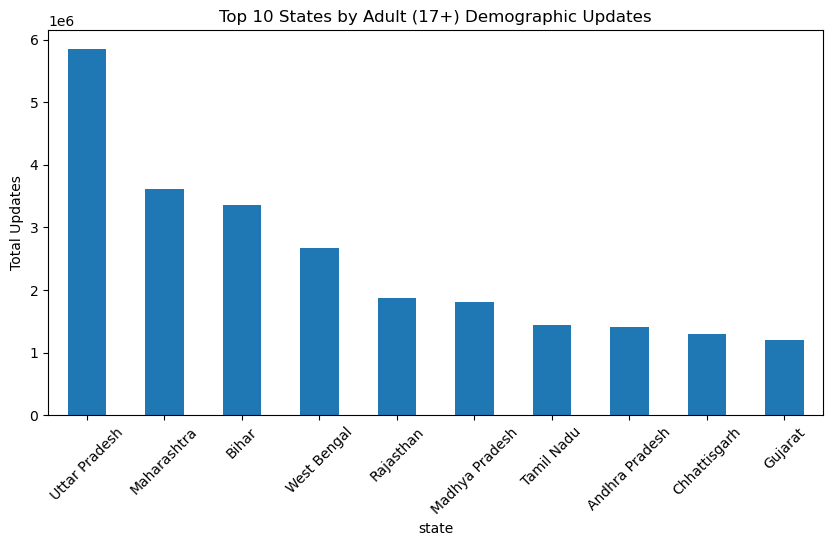

In [30]:
top_adult = (
    df.groupby('state')['demo_age_17_']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_adult.plot(
    kind='bar',
    figsize=(10,5),
    title='Top 10 States by Adult (17+) Demographic Updates'
)
plt.ylabel('Total Updates')
plt.xticks(rotation=45)
plt.show()

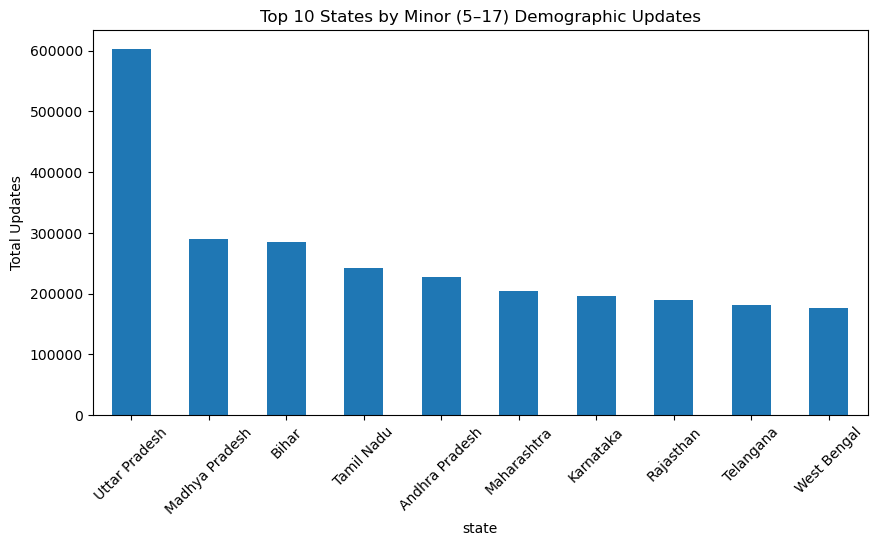

In [31]:
top_minor = (
    df.groupby('state')['demo_age_5_17']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_minor.plot(
    kind='bar',
    figsize=(10,5),
    title='Top 10 States by Minor (5–17) Demographic Updates'
)
plt.ylabel('Total Updates')
plt.xticks(rotation=45)
plt.show()


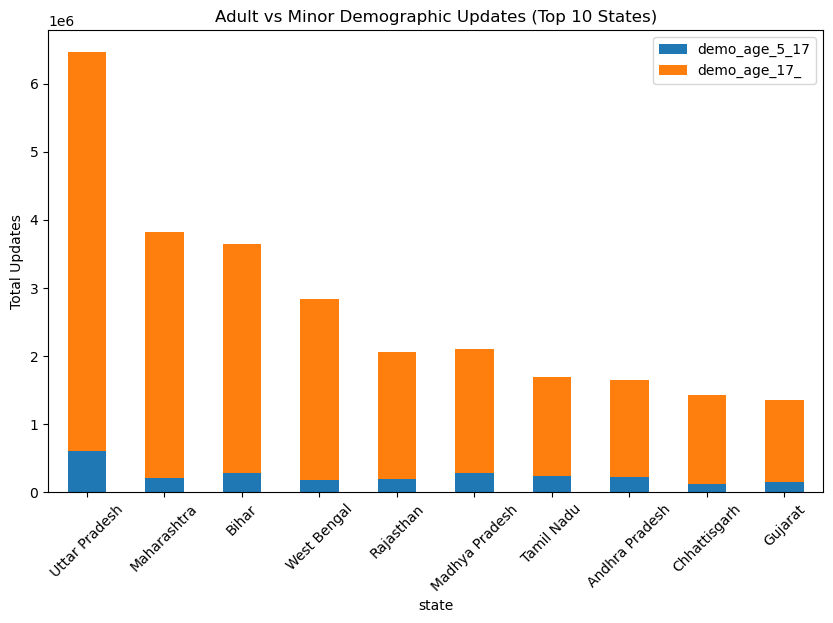

In [32]:
state_age = df.groupby('state')[['demo_age_5_17','demo_age_17_']].sum()
state_age = state_age.sort_values('demo_age_17_', ascending=False).head(10)

state_age.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    title='Adult vs Minor Demographic Updates (Top 10 States)'
)

plt.ylabel('Total Updates')
plt.xticks(rotation=45)
plt.show()


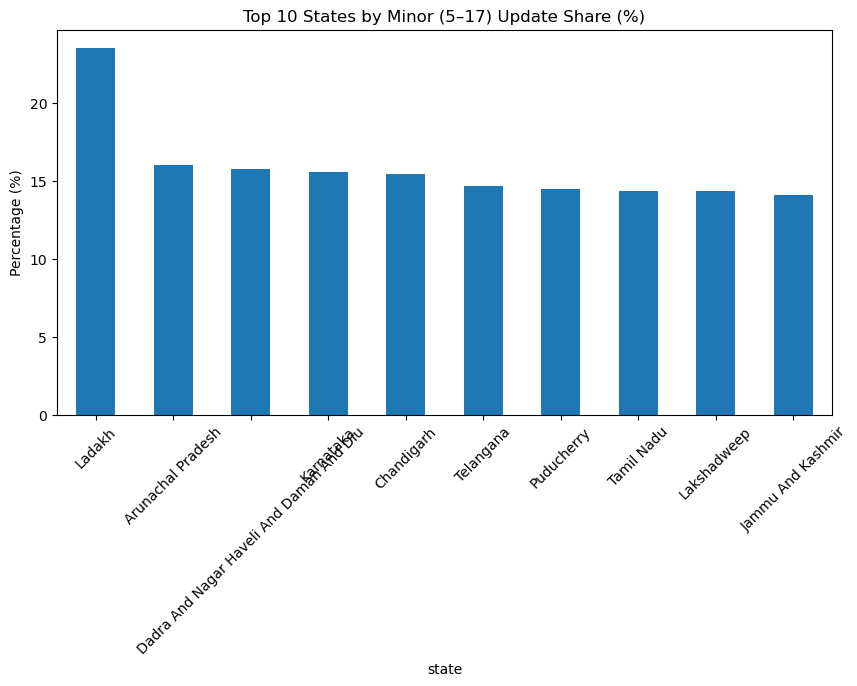

In [33]:
minor_share = (
    df.groupby('state')['demo_age_5_17'].sum() /
    df.groupby('state')['total_demo_updates'].sum()
) * 100

minor_share = minor_share.sort_values(ascending=False).head(10)

minor_share.plot(
    kind='bar',
    figsize=(10,5),
    title='Top 10 States by Minor (5–17) Update Share (%)'
)

plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()


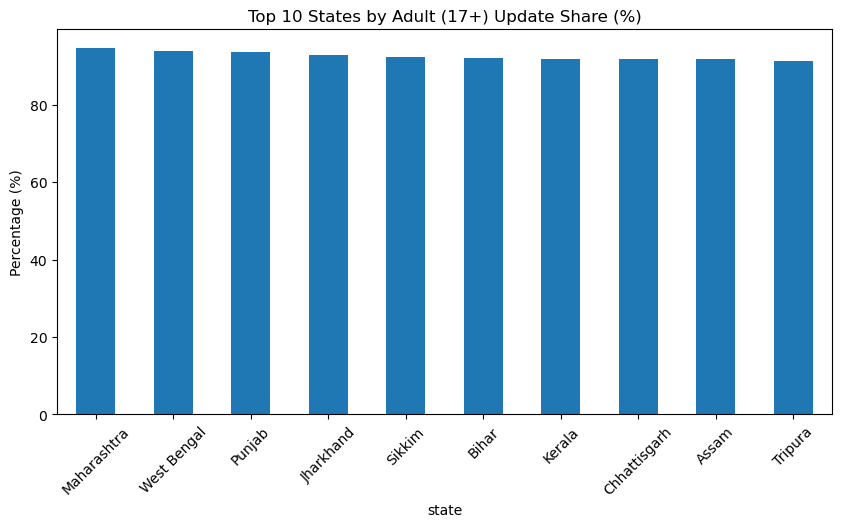

In [34]:
adult_share = (
    df.groupby('state')['demo_age_17_'].sum() /
    df.groupby('state')['total_demo_updates'].sum()
) * 100

adult_share = adult_share.sort_values(ascending=False).head(10)

adult_share.plot(
    kind='bar',
    figsize=(10,5),
    title='Top 10 States by Adult (17+) Update Share (%)'
)

plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()


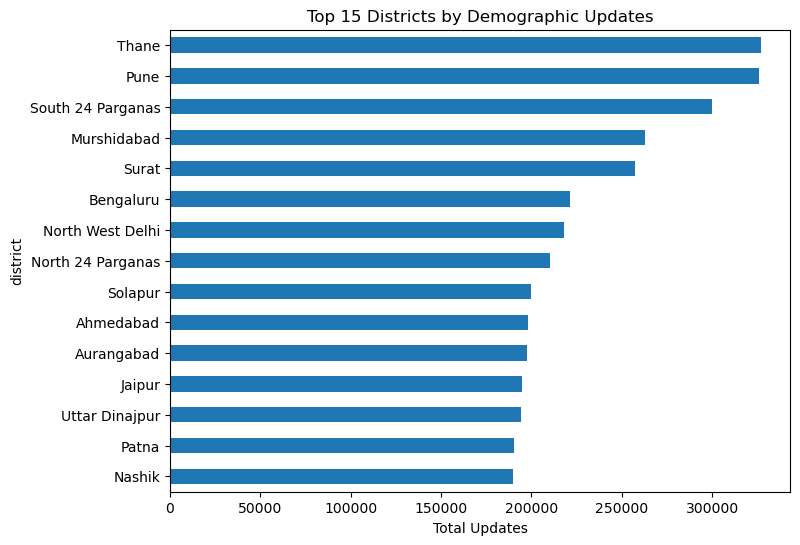

In [35]:
top_districts = (
    df.groupby('district')['total_demo_updates']
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

top_districts.plot(
    kind='barh',
    figsize=(8,6),
    title='Top 15 Districts by Demographic Updates'
)

plt.xlabel('Total Updates')
plt.gca().invert_yaxis()
plt.show()


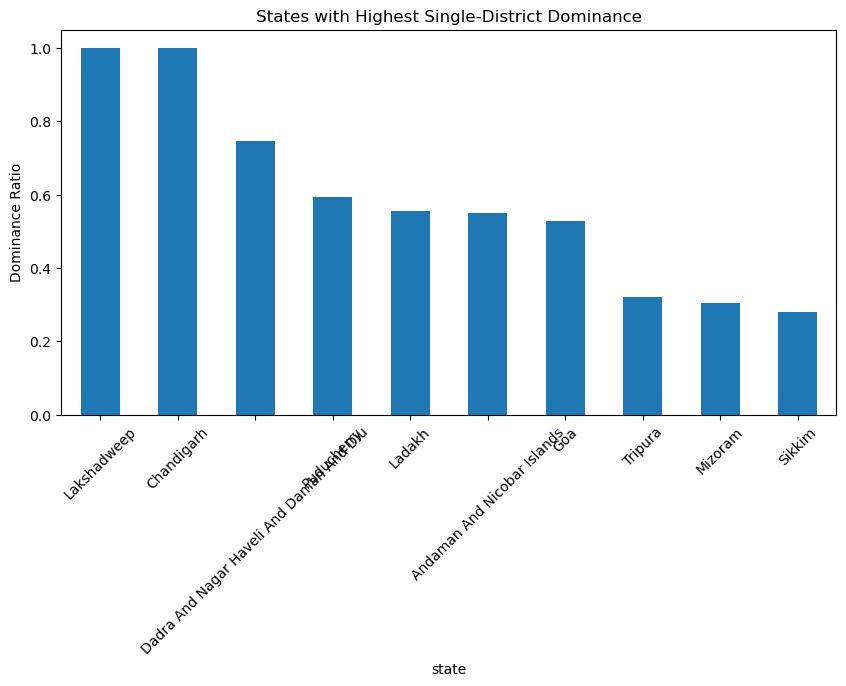

In [36]:
district_ratio = (
    df.groupby(['state','district'])['total_demo_updates']
    .sum()
    .groupby(level=0)
    .apply(lambda x: x.max() / x.sum())
    .sort_values(ascending=False)
    .head(10)
)

district_ratio.plot(
    kind='bar',
    figsize=(10,5),
    title='States with Highest Single-District Dominance'
)

plt.ylabel('Dominance Ratio')
plt.xticks(rotation=45)
plt.show()


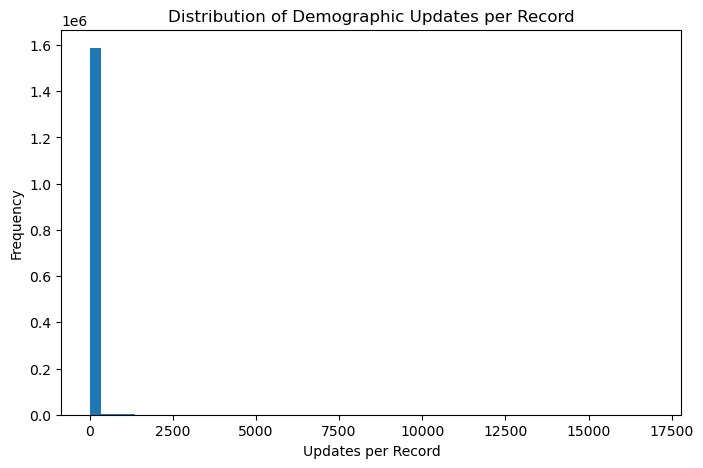

In [37]:
plt.figure(figsize=(8,5))
plt.hist(df['total_demo_updates'], bins=50)
plt.title('Distribution of Demographic Updates per Record')
plt.xlabel('Updates per Record')
plt.ylabel('Frequency')
plt.show()


<Figure size 1000x500 with 0 Axes>

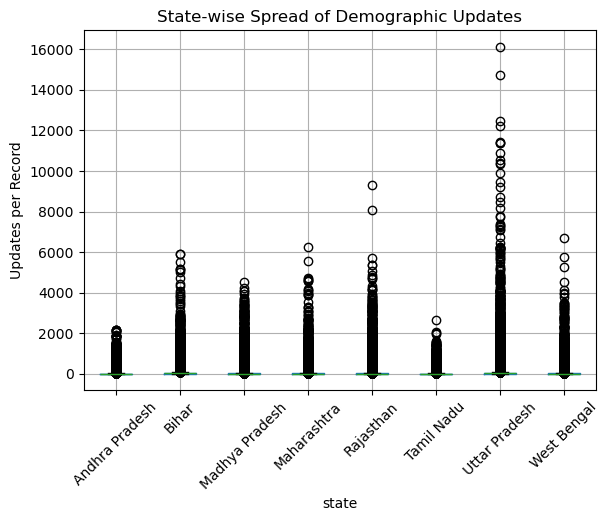

In [38]:
top_states = state_demo.head(8).index
subset = df[df['state'].isin(top_states)]

plt.figure(figsize=(10,5))
subset.boxplot(
    column='total_demo_updates',
    by='state',
    rot=45
)
plt.title('State-wise Spread of Demographic Updates')
plt.suptitle('')
plt.ylabel('Updates per Record')
plt.show()


### Data Cleaning Approach (Demographic Dataset)

The demographic dataset was analysed to understand post-enrolment profile update patterns across different regions and age groups.
Since the data was provided in multiple files and contained real-world inconsistencies, a structured cleaning process was required
before performing any analysis.

All demographic files were first merged into a single dataset to ensure complete coverage.
Duplicate records were identified and removed to avoid repeated counting of update events.

The `state` column required special attention, as it contained a mix of valid state names, old spellings,
district or city names, and even numeric values.
State names were standardized using string normalization and mapping of legacy names.
A whitelist-based validation approach was then applied to retain only valid Indian states and union territories.
After this step, the dataset correctly reflected records from 36 valid administrative units.

Age-group columns (`demo_age_5_17` and `demo_age_17_`) were initially stored as text values.
These columns were converted into numeric format, and missing values were treated as zero to ensure accurate aggregation.
A new derived column, `total_demo_updates`, was created to represent the total number of demographic updates per record.

Dates were safely parsed and retained only for reference.
No assumptions were made at the daily level, and the analysis does not rely on date-based trends to avoid ambiguity.

After cleaning, the dataset contained consistent state names, valid numeric age-group values,
and no invalid administrative entries, making it suitable for demographic analysis.


### Demographic Analysis

### Key Observations from Demographic Analysis

State-wise analysis shows a significant imbalance in demographic update volumes across regions.
A small number of states contribute a disproportionately high share of total demographic updates,
indicating higher administrative load and frequent profile changes in these regions.

Age-group analysis reveals that the majority of demographic updates are contributed by the adult population (17+).
This suggests that most updates occur after enrolment and are likely linked to address changes,
contact detail updates, or life-stage transitions.

In contrast, updates from the 5–17 age group form a smaller but meaningful share,
highlighting education-related or guardian-driven profile changes in certain states.

District-level analysis shows that demographic updates are often concentrated in a limited number of districts within a state.
Such concentration indicates localized service pressure, particularly in urban or high-population districts.

Overall, the demographic dataset reflects post-enrolment behaviour rather than initial registration activity
and highlights regions where Aadhaar profile maintenance demand is consistently high.


### Practical Interpretation

The observed patterns suggest that demographic updates are not evenly distributed across regions or age groups.
States and districts with high update volumes may require better online update facilities
or improved capacity planning at demographic update centres.

Since this dataset captures only demographic update counts and not the underlying reasons,
no assumptions are made regarding migration or socio-economic factors.
Further insights can be derived by combining these findings with enrolment and biometric datasets.


### Limitations

This analysis is limited to age-group based demographic update counts.
The dataset does not include information on the type of demographic change,
reasons for updates, or authentication success.
As a result, the analysis focuses on update volume and distribution rather than causality.


### Next Steps

The cleaned demographic dataset can be combined with enrolment data
to compare enrolment volumes with post-enrolment update behaviour.
Further analysis using biometric data will help assess whether high update regions
also experience authentication or infrastructure challenges.

In [43]:
df.to_csv(
    "../cleaned/demographic_clean_final.csv",
    index=False
)
